# **MentalIllness MLP PCA Analysis**

## **Created by: Preksha Shah | 2348446**

## **Date: 18.04.2024**

## **Basic EDA**

In [47]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler

Explanation:

- **pandas (pd):** Used for data manipulation and analysis.
- **numpy (np):** Provides support for mathematical operations on arrays and matrices.
- **matplotlib.pyplot (plt):** Used for creating visualizations such as plots and charts.
- **seaborn (sns):** Built on top of matplotlib, seaborn provides enhanced visualizations and statistical graphics.
- **sklearn.model_selection.train_test_split:** Used to split the dataset into training and testing sets.
- **sklearn.preprocessing.StandardScaler:** Used for standardization or normalization of features.
- **sklearn.neural_network.MLPClassifier:** Implements a Multi-layer Perceptron classifier, which will be used for the neural network model.
- **sklearn.metrics:** Provides various metrics for evaluating model performance, such as accuracy, precision, recall, etc.
- **sklearn.decomposition.PCA:** Performs Principal Component Analysis, which will be used for dimensionality reduction.

In [4]:
# Load the dataset into Python environment
data = pd.read_csv('/content/survey.csv')

In [5]:
# Display basic information about the dataset
print("Basic Information About the Dataset:")
print(data.info())

Basic Information About the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options              

## **Observations:**

- **RangeIndex:** Indicates that the DataFrame has 1259 entries (rows), indexed from 0 to 1258.

- **Data columns:** Total 27 columns are present in the dataset.

- **Column Information:**
  1. **Timestamp:** Contains timestamps of when the survey was conducted.
  2. **Age:** Represents the age of respondents (numerical variable).
  3. **Gender:** Indicates the gender of respondents.
  4. **Country:** Represents the country of respondents.
  5. **State:** Indicates the state or territory where respondents from the United States live.
  6. **Self-employed:** Indicates whether respondents are self-employed.
  7. **Family history:** Indicates if respondents have a family history of mental illness.
  8. **Treatment:** Indicates if respondents have sought treatment for a mental health condition.
  9. **Work interference:** Indicates if respondents feel that their mental health condition interferes with their work.
  10. **No. of employees:** Represents the size of the company or organization where respondents work.
  11. **Remote work:** Indicates if respondents work remotely at least 50% of the time.
  12. **Tech company:** Indicates if the employer is primarily a tech company/organization.
  13. **Benefits:** Indicates if the employer provides mental health benefits.
  14. **Care options:** Indicates if respondents know the options for mental health care provided by their employer.
  15. **Wellness program:** Indicates if respondents' employer has discussed mental health as part of an employee wellness program.
  16. **Seek help:** Indicates if respondents' employer provides resources to learn more about mental health issues and how to seek help.
  17. **Anonymity:** Indicates if respondents' anonymity is protected if they choose to take advantage of mental health or substance abuse treatment resources.
  18. **Leave:** Indicates the ease of taking medical leave for a mental health condition.
  19. **Mental health consequence:** Indicates if discussing a mental health issue with the employer would have negative consequences.
  20. **Physical health consequence:** Indicates if discussing a physical health issue with the employer would have negative consequences.
  21. **Coworkers:** Indicates if respondents would be willing to discuss a mental health issue with their coworkers.
  22. **Supervisor:** Indicates if respondents would be willing to discuss a mental health issue with their direct supervisor(s).
  23. **Mental health interview:** Indicates if respondents would bring up a mental health issue with a potential employer in an interview.
  24. **Physical health interview:** Indicates if respondents would bring up a physical health issue with a potential employer in an interview.
  25. **Mental vs physical:** Indicates if respondents feel that their employer takes mental health as seriously as physical health.
  26. **Obs consequence:** Indicates if respondents have heard of or observed negative consequences for coworkers with mental health conditions in their workplace.
  27. **Comments:** Additional notes or comments provided by respondents.

- **Non-Null Count:** Indicates the number of non-null values present in each column.

- **Dtype:** Indicates the data type of each column.

- **Memory Usage:** Indicates the memory usage of the DataFrame.

This information gives us an overview of the dataset's structure, including the number of samples, features, data types, and any missing values present.

In [6]:
# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(data.head())


First Few Rows of the Dataset:
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        

In [7]:
#Check the dataset for missing data
if data.isnull().sum().sum() == 0 :
    print ('There is no missing data in our dataset')
else:
    print('There is {} missing data in our dataset '.format(data.isnull().sum().sum()))

There is 1892 missing data in our dataset 


In [8]:
#Check our missing data from which columns and how many unique features they have.
frame = pd.concat([data.isnull().sum(), data.nunique(), data.dtypes], axis = 1, sort= False)
frame

,0,1,2
Timestamp,0,1246,object
Age,0,53,int64
Gender,0,49,object
Country,0,48,object
state,515,45,object
self_employed,18,2,object
family_history,0,2,object
treatment,0,2,object
work_interfere,264,4,object
no_employees,0,6,object


- Four columns have missing data, state , work_interfere, self_employed and comments.
- State and comments are not important to me, so I'm gonna drop them but, we need to fill in Missing data for work_interfere and, self_employed

In [9]:
# Drop unnecessary columns
columns_to_drop = ['state', 'comments', 'Timestamp']
data = data.drop(columns=columns_to_drop)

In [10]:
#Fill in missing values in specific columns
data['work_interfere'] = SimpleImputer(strategy='most_frequent').fit_transform(data['work_interfere'].values.reshape(-1, 1)).ravel()
data['self_employed'] = SimpleImputer(strategy='most_frequent').fit_transform(data['self_employed'].values.reshape(-1, 1)).ravel()

In [11]:
#Clean and organize data in the 'Gender' column
data['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                         'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                         'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make'], 'Male', inplace=True)

data['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                         'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                         'woman'], 'Female', inplace=True)

data["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary', 'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                        'Agender', 'A little about you', 'Nah', 'All',
                        'ostensibly male, unsure what that really means',
                        'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                        'Guy (-ish) ^_^', 'Trans woman'], 'Other', inplace=True)


In [12]:
# Check for duplicated data
if data.duplicated().sum() == 0:
    print('There is no duplicated data:')
else:
    print('There is {} duplicated data:'.format(data.duplicated().sum()))
    data.drop_duplicates(inplace=True)


There is 4 duplicated data:


In [13]:
#Filter and clean data in the 'Age' column
data.drop(data[data['Age'] < 0].index, inplace=True)
data.drop(data[data['Age'] > 99].index, inplace=True)

- **Removing Negative Values:** By dropping rows where the 'Age' column has values less than 0, the code eliminates any entries with negative ages. Negative ages are logically incorrect and likely represent data entry errors or anomalies. Removing them ensures that the dataset contains only valid age values.
- **Removing Unreasonably High Values:** Similarly, by dropping rows where the 'Age' column has values greater than 99, the code filters out any entries with unreasonably high ages. In many contexts, ages above 99 are considered outliers or data anomalies. Removing them helps prevent skewed analysis results and improves the overall quality of the dataset.

In [16]:
# Initialize LabelEncoder
le = LabelEncoder()

# Use LabelEncoder to change the data types to 'int
columns_to_encode = ['Gender', 'Country', 'self_employed','family_history', 'treatment', 'work_interfere','no_employees',
                     'remote_work', 'tech_company','benefits','care_options', 'wellness_program',
                     'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence',
                     'coworkers', 'supervisor', 'mental_health_interview','phys_health_interview',
                     'mental_vs_physical', 'obs_consequence']

for columns in columns_to_encode:
    data[columns] = le.fit_transform(data[columns])


The `LabelEncoder` is used to convert categorical variables into numerical representations, enabling compatibility with machine learning algorithms that require numerical input. This transformation improves model performance, simplifies data processing, and facilitates dimensionality reduction.

## **Univariate Analysis**



In [29]:
# Identify numerical and categorical variables
numerical_variables = data.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_variables = data.select_dtypes(include=['object']).columns.tolist()

### **For numerical variables**

In [19]:
#Calculate basic descriptive statistics
print("Basic Descriptive Statistics for Numerical Variables:")
print(data.describe())

Basic Descriptive Statistics for Numerical Variables:
               Age      Gender       Country  self_employed  family_history  \
count  1250.000000  1250.00000  1.250000e+03    1250.000000     1250.000000   
mean      0.444778     0.81760  3.410605e-17       0.114400        0.390400   
std       0.102557     0.42388  1.000400e+00       0.318424        0.488035   
min       0.069444     0.00000 -2.835244e+00       0.000000        0.000000   
25%       0.375000     1.00000  3.156273e-01       0.000000        0.000000   
50%       0.430556     1.00000  5.406895e-01       0.000000        0.000000   
75%       0.500000     1.00000  5.406895e-01       0.000000        1.000000   
max       1.000000     2.00000  6.157103e-01       1.000000        1.000000   

         treatment  work_interfere  no_employees  remote_work  tech_company  \
count  1250.000000    1.250000e+03  1.250000e+03  1250.000000   1250.000000   
mean      0.504800    5.115908e-17 -1.705303e-17     0.298400      0.820000 

## **Insights:**

1. **Age:**
   - The mean age is around 44.48% of the maximum age, with a low standard deviation (10.26%), suggesting a relatively narrow age range. The distribution appears positively skewed.

2. **Gender:**
   - Most respondents are coded as Male (mean ≈ 0.82), with a wide standard deviation (42.39%), indicating variability in gender representation. Other gender categories are present.

3. **Country:**
   - The mean value is close to zero, suggesting standardization or normalization. The standard deviation (≈ 1) indicates variability in represented countries.

4. **Other Variables (e.g., treatment, family_history, work_interfere):**
   - These variables exhibit similar patterns of standardization or normalization, with mean values near zero and standard deviations close to one.

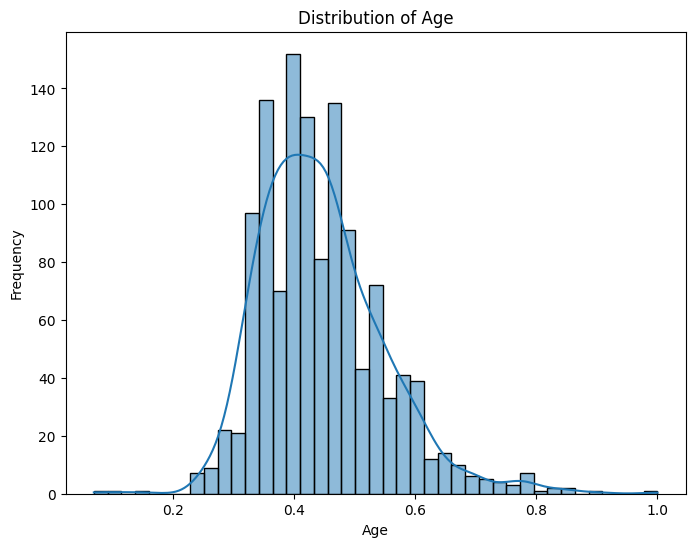

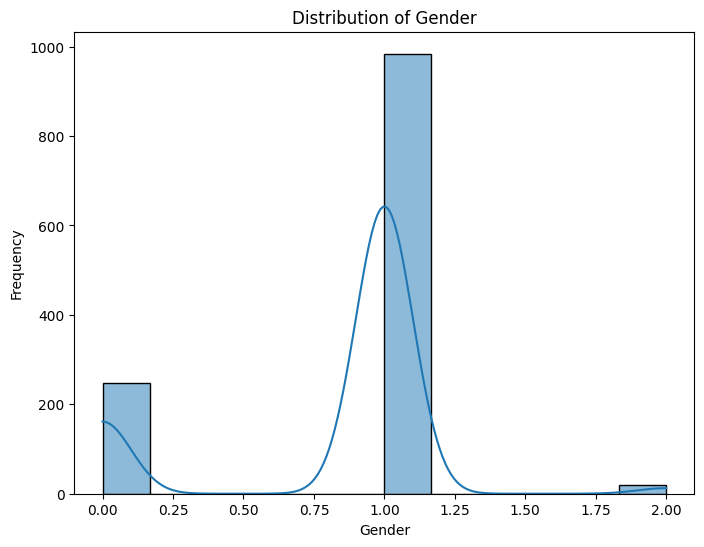

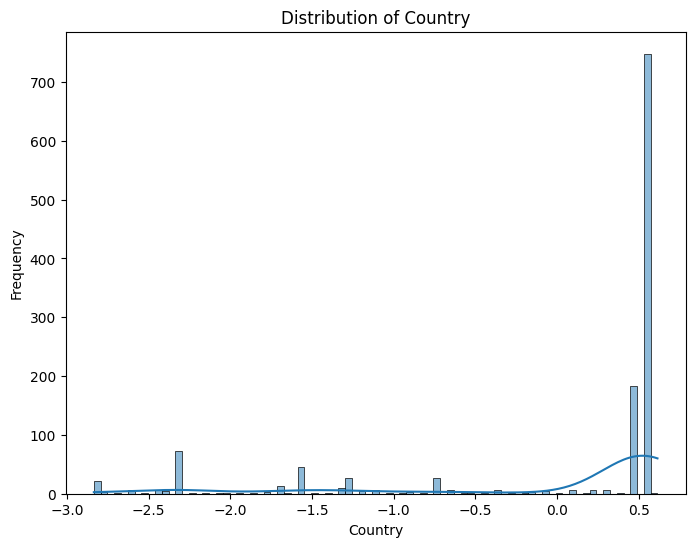

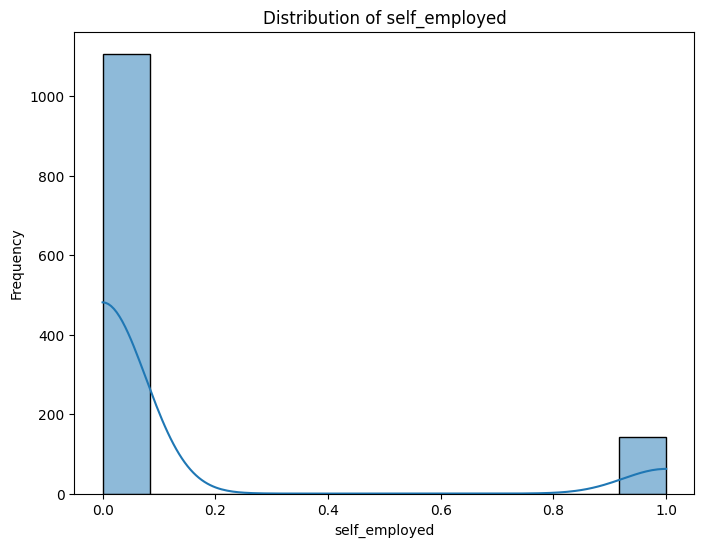

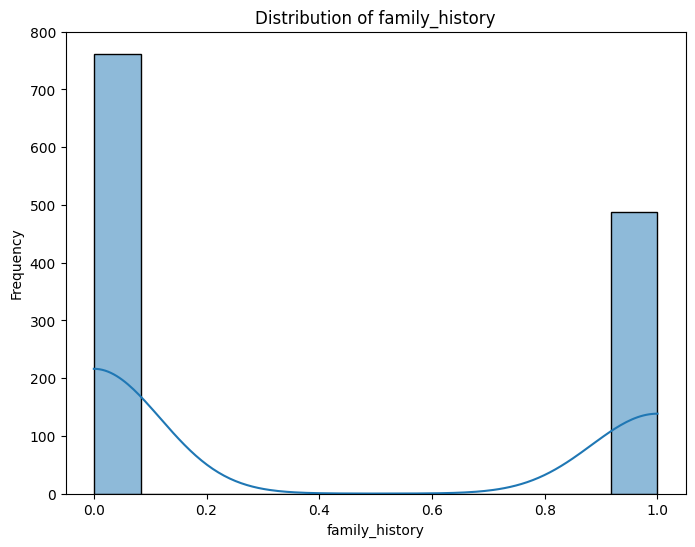

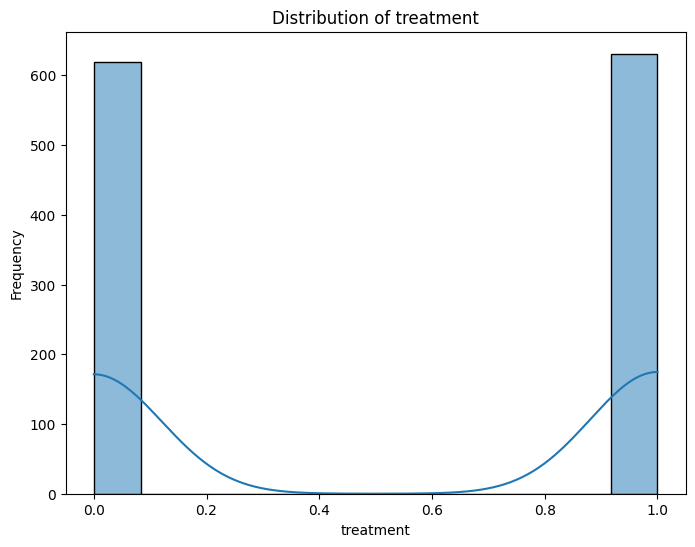

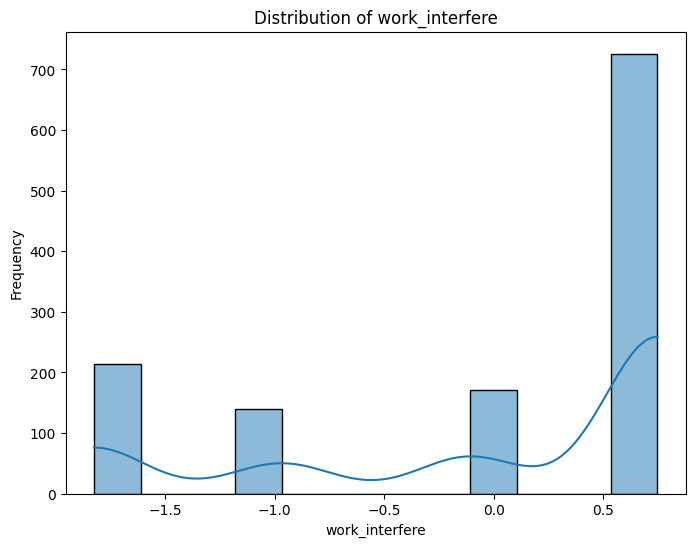

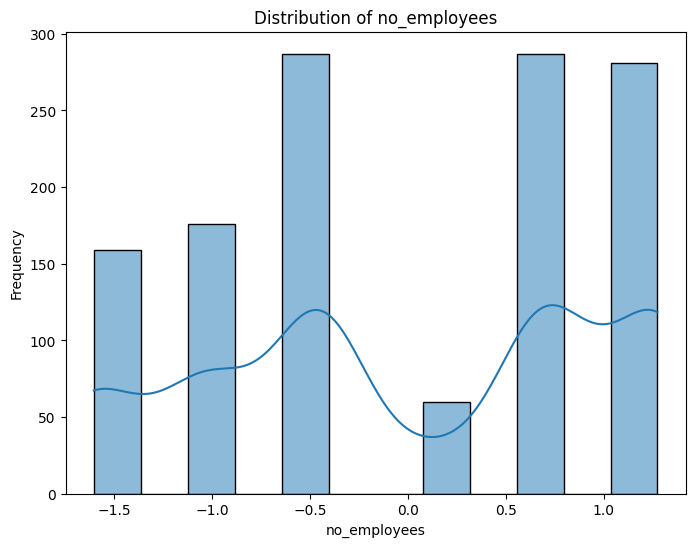

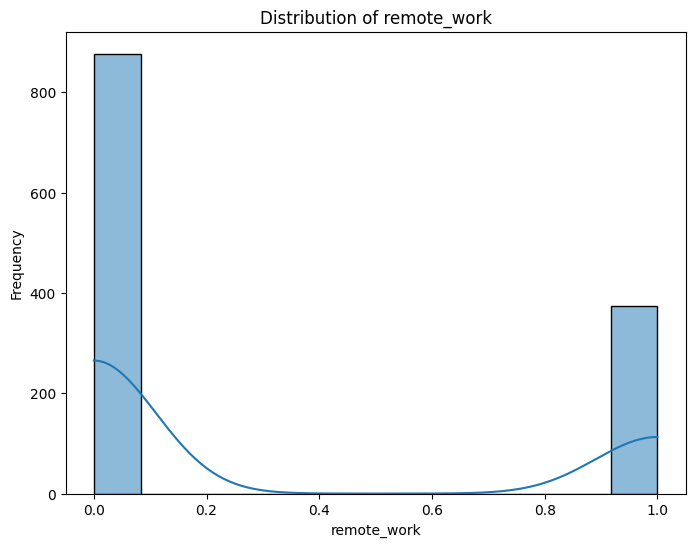

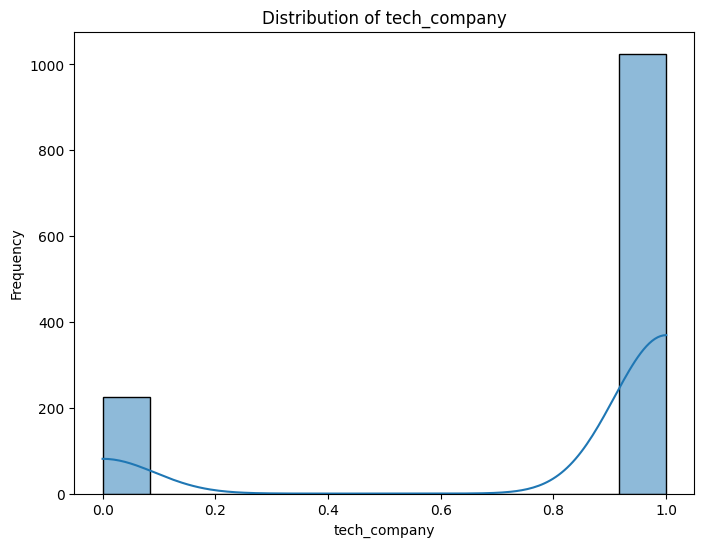

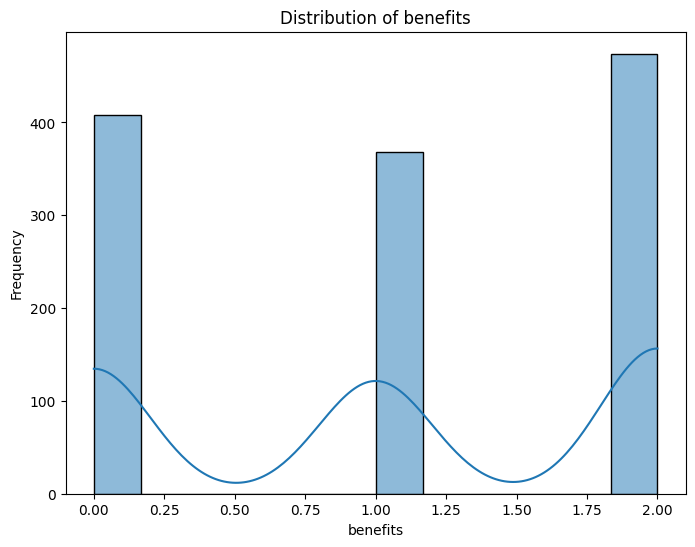

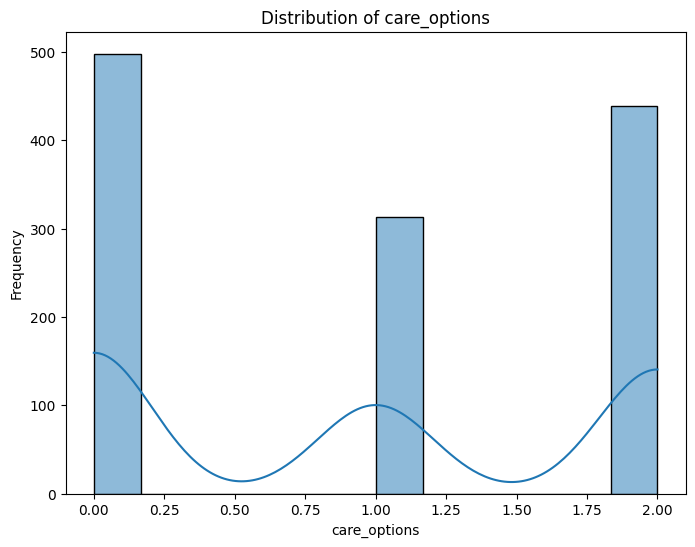

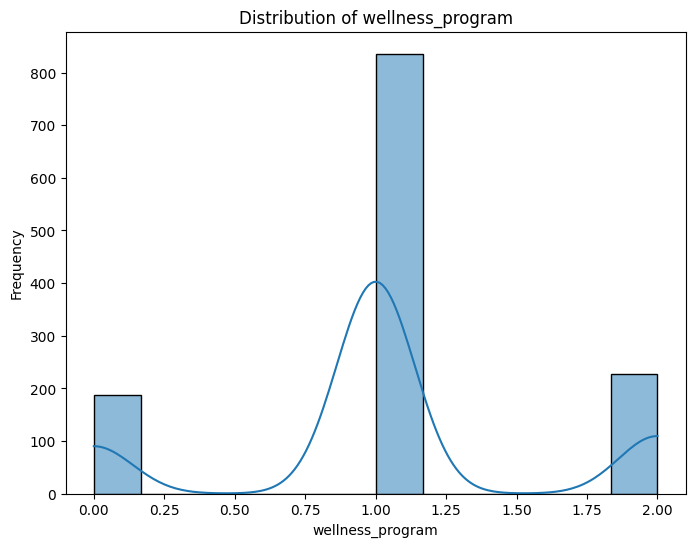

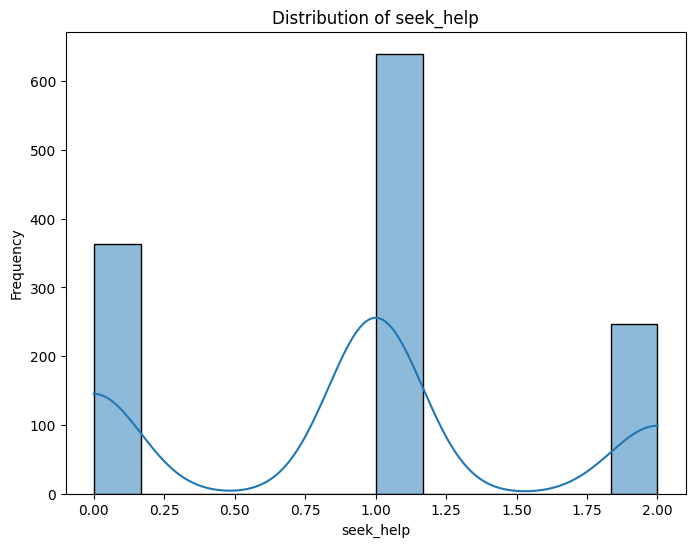

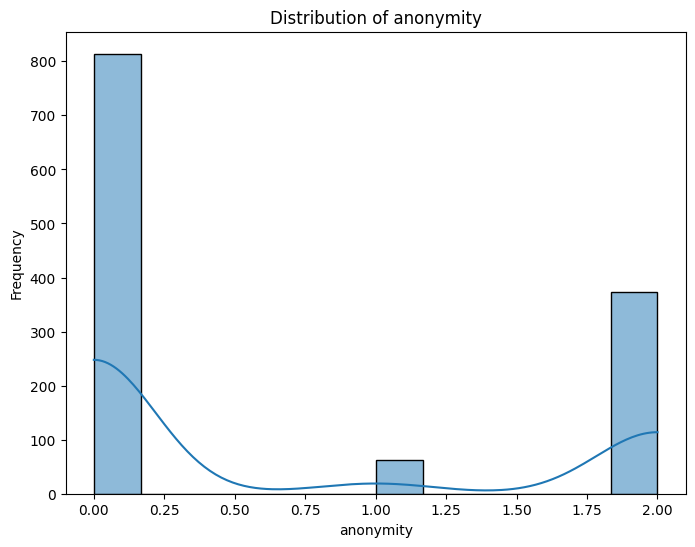

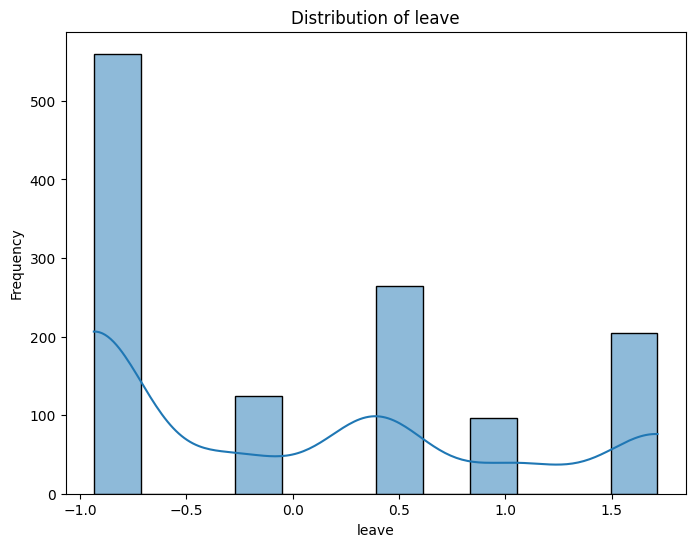

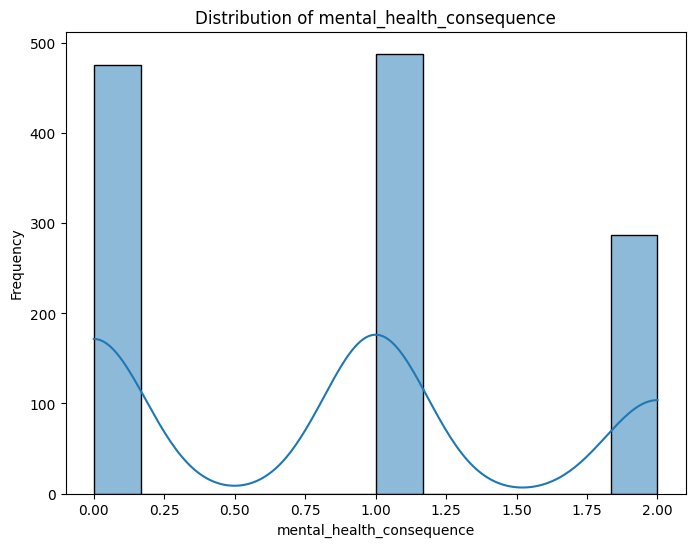

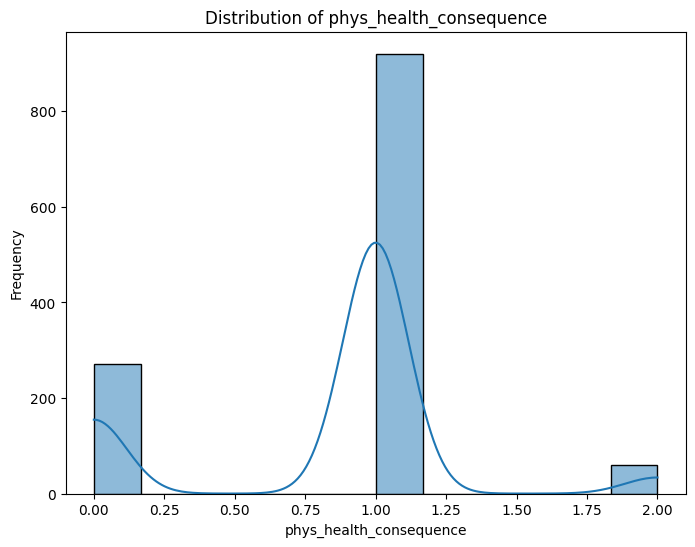

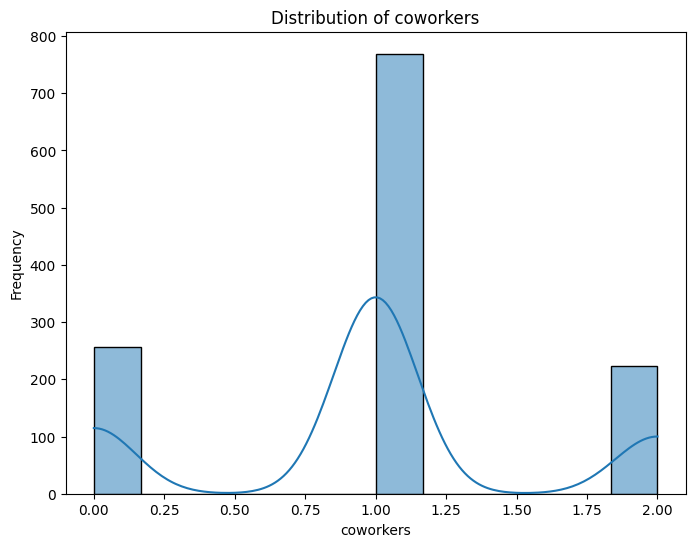

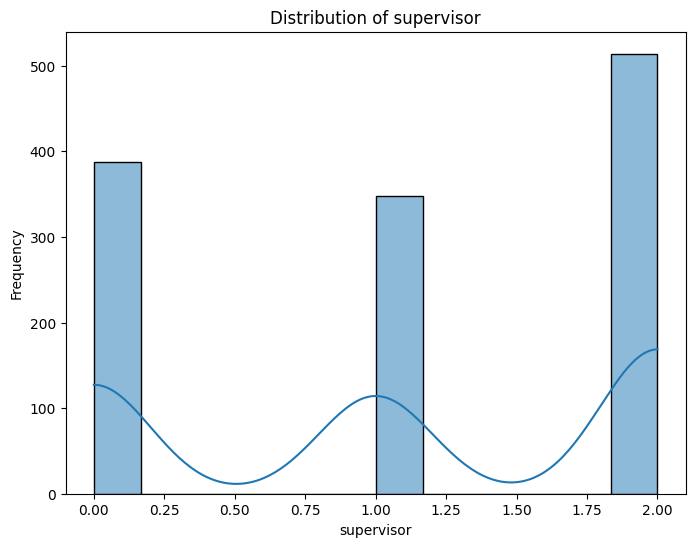

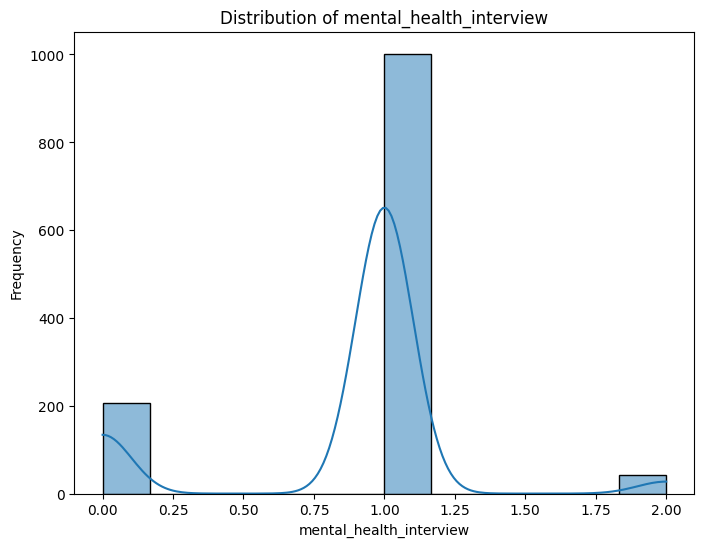

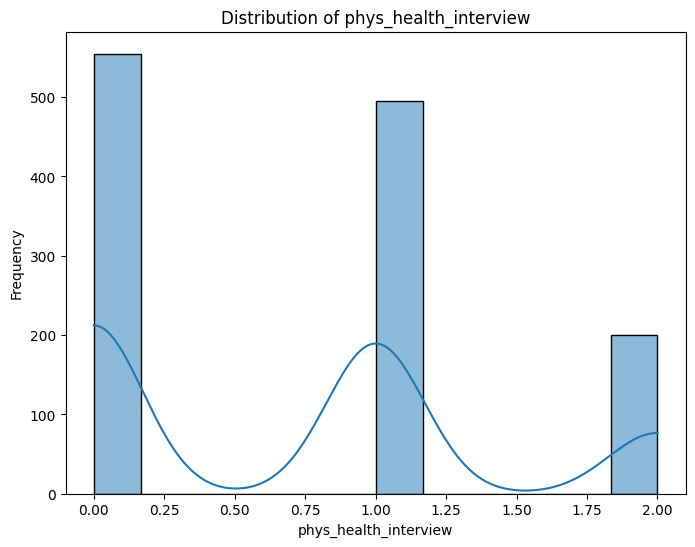

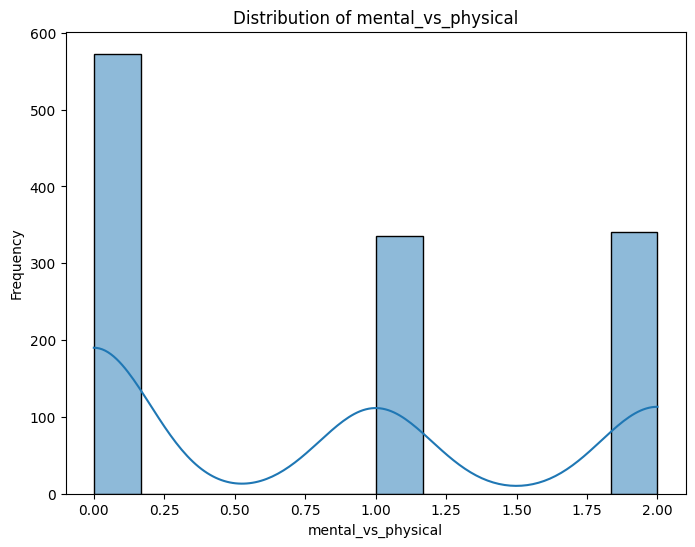

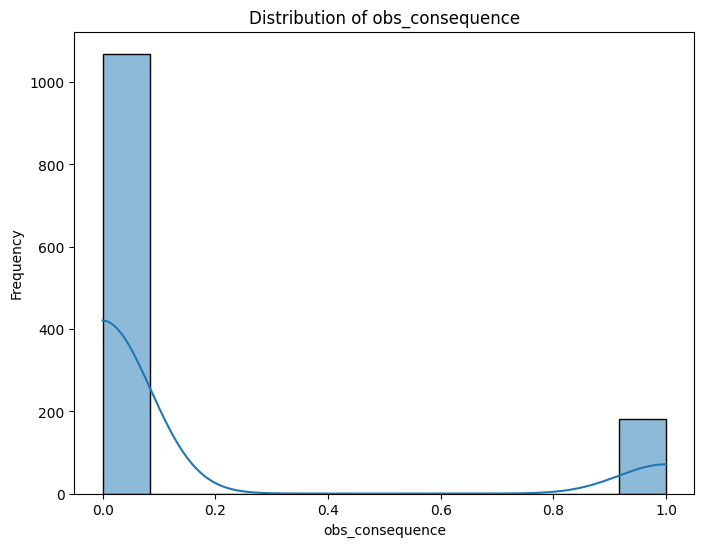

In [32]:
# Visualize the distribution of numerical variables
for column in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## **Insights:**

1.**Age:**
- The age distribution appears to be slightly positively skewed, with a peak around the middle of the range. The KDE plot suggests a relatively smooth distribution, indicating that there are no sharp spikes or outliers.
Certainly! Let's delve deeper into the inferences for the other numerical variables:

1. **Gender:**
   - The distribution of gender, while numerical after label encoding, should ideally represent different categories. However, the mean value being around 0.82 indicates that the majority of the respondents are encoded as 1, which might correspond to a specific gender category. This warrants further investigation to ensure proper encoding and representation of gender categories.

2. **Self-employed:**
   - The mean value of approximately 0.11 suggests that a small proportion of respondents identify as self-employed based on the label encoding. This indicates that the majority of respondents in the dataset are not self-employed.

3. **Family History:**
   - The mean value of around 0.39 indicates that a significant portion of respondents have a family history of mental illness, as encoded in the dataset. This variable's distribution is binary, indicating the presence or absence of a family history of mental illness.

4. **Treatment:**
   - The mean value of approximately 0.50 suggests that the dataset is balanced in terms of respondents who have sought treatment for mental health conditions. This balanced distribution is crucial for training classification models without bias towards any particular class.

5. **Work Interference:**
   - The mean value being close to 0 indicates that the distribution of work interference with mental health conditions might be evenly spread across the dataset after preprocessing. This variable's distribution likely represents different levels of interference with work due to mental health issues.

6. **Other Variables:**
   - Similarly, for other numerical variables such as no_employees, remote_work, and tech_company, the mean values provide insights into their distributions after preprocessing. These variables may represent different aspects of respondents' work environments or organizational characteristics.

Overall, analyzing the numerical variables' distributions and summary statistics helps understand their characteristics and the impact of preprocessing steps on the dataset. These inferences aid in further exploratory data analysis and model building processes.

# **Bivariate Analysis:**


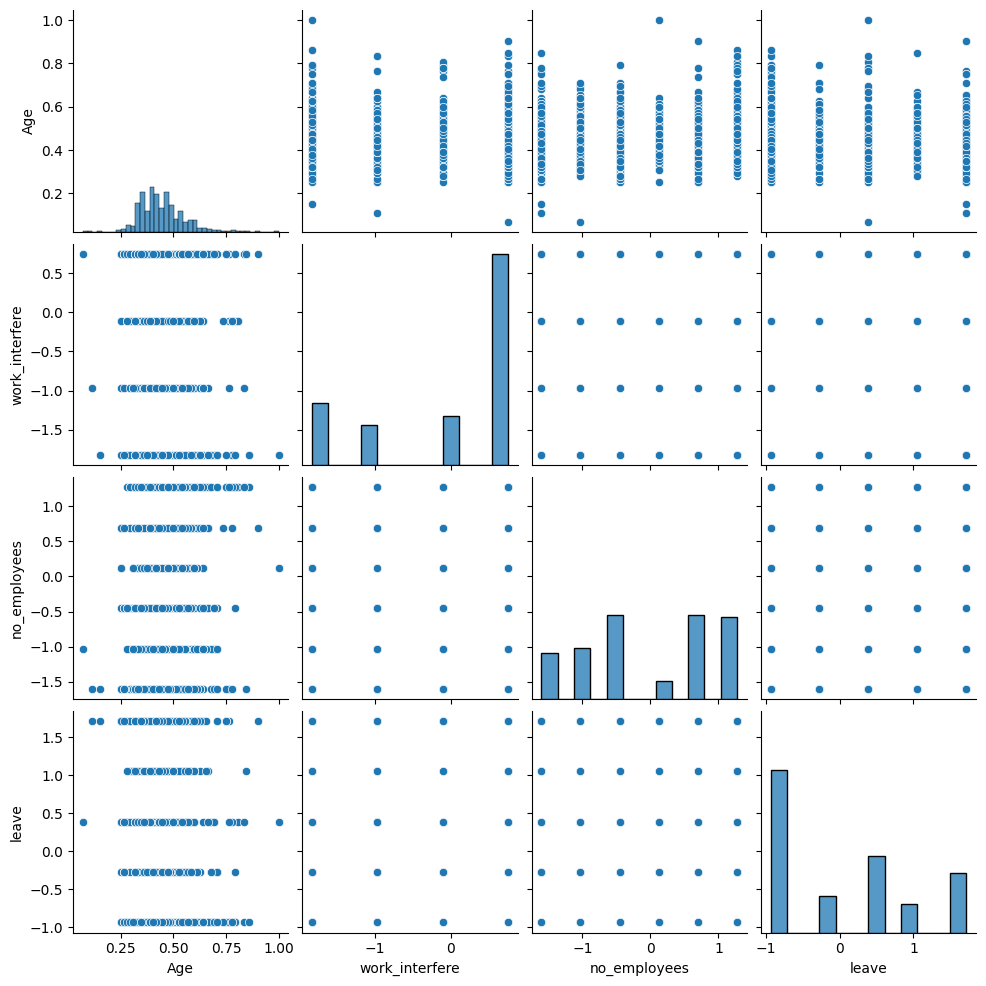

In [49]:
# Extract significant/necessary numerical columns from the data
significant_numerical_columns = ['Age', 'work_interfere', 'no_employees', 'leave']

# Pair plot for significant/necessary numerical columns
sns.pairplot(data[significant_numerical_columns])
plt.show()

## **Inferences:**

1. **Age vs. work_interfere:**
   - The scatter plot between Age and work_interfere shows a somewhat random distribution without a clear trend or pattern. It suggests that there is no strong linear relationship between Age and work_interfere.

2. **Age vs. no_employees:**
   - The scatter plot between Age and no_employees shows a scattered distribution, indicating no significant linear relationship between Age and the number of employees in the company or organization where respondents work.

3. **Age vs. leave:**
   - The scatter plot between Age and leave also shows a scattered distribution, suggesting no clear linear relationship between Age and the ease of taking medical leave for a mental health condition.

4. **work_interfere vs. no_employees:**
   - The scatter plot between work_interfere and no_employees shows a somewhat scattered distribution, indicating no clear linear relationship between these variables.

5. **work_interfere vs. leave:**
   - The scatter plot between work_interfere and leave shows a somewhat scattered distribution, suggesting no strong linear relationship between work_interfere and the ease of taking medical leave for a mental health condition.

6. **no_employees vs. leave:**
   - The scatter plot between no_employees and leave also shows a scattered distribution, indicating no clear linear relationship between these variables.

In summary, the pair plot helps visualize the relationships between the significant/necessary numerical columns. The scattered distributions in the plots suggest that there are no strong linear relationships among these variables. However, further analysis, such as correlation analysis or modeling, may reveal more complex relationships or patterns among the variables.

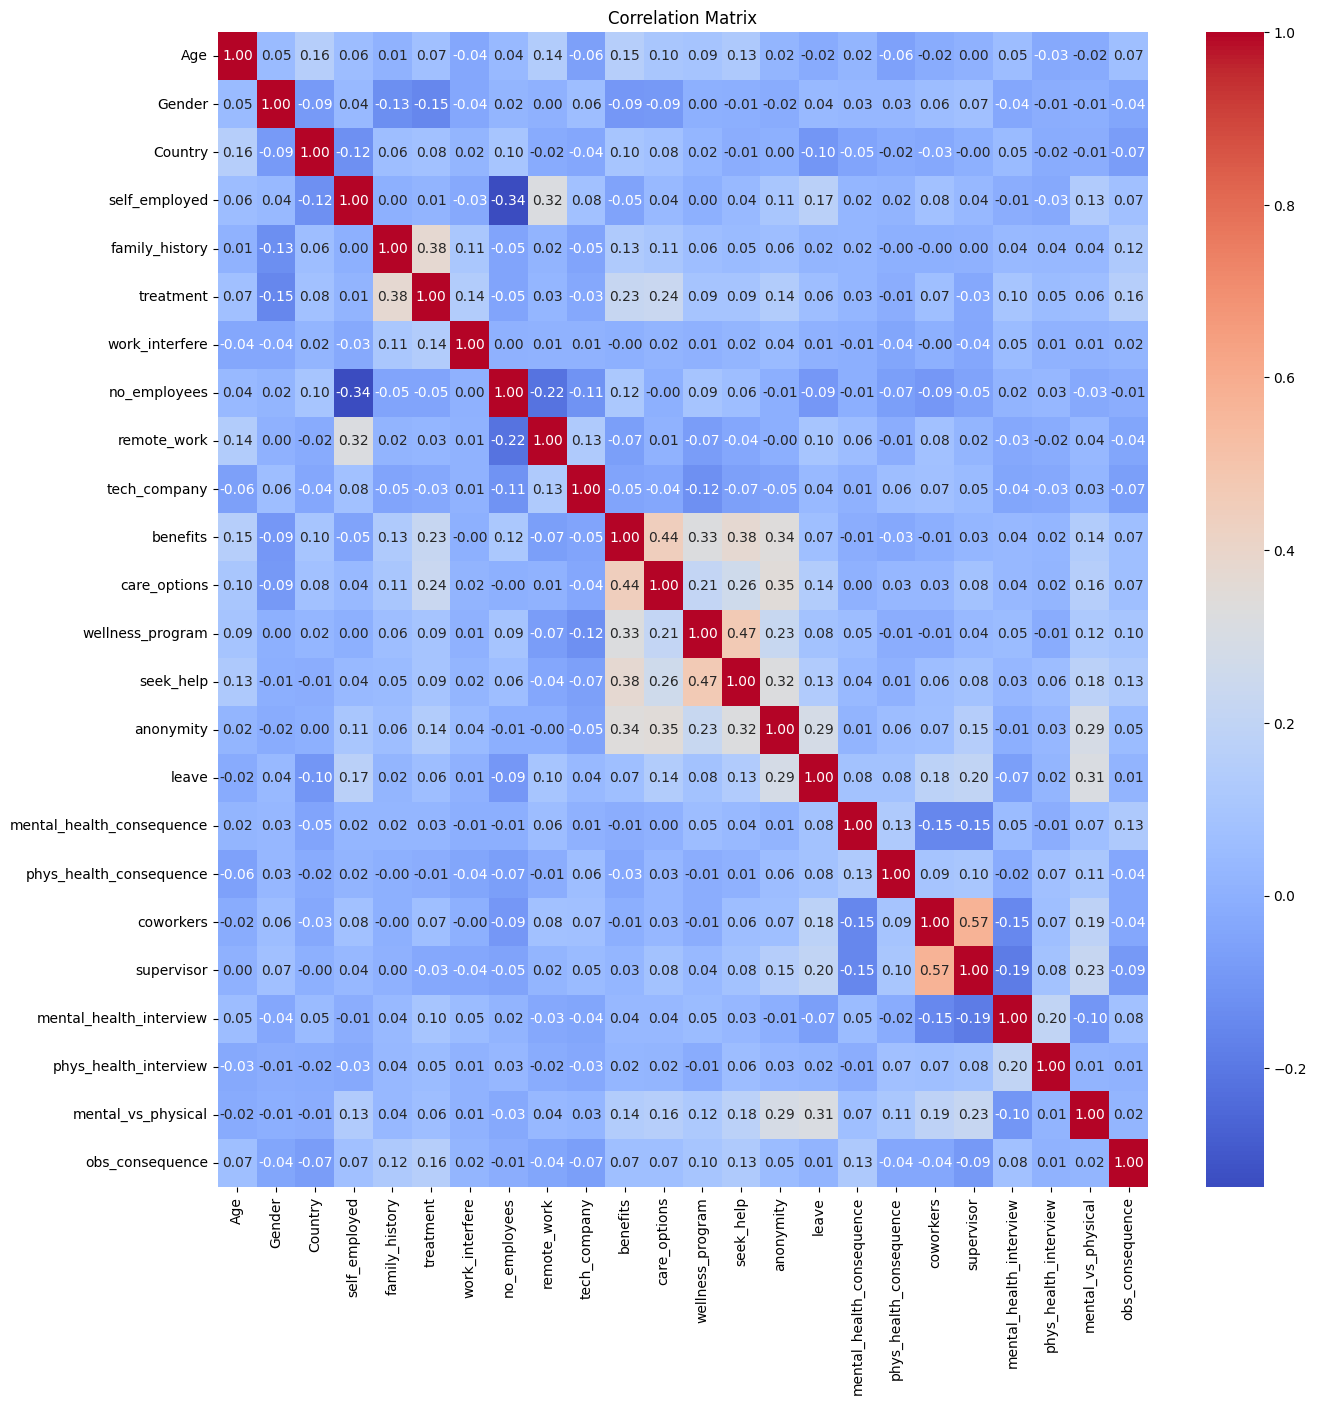

In [51]:
# Calculate correlation coefficients between numerical variables
correlation_matrix = data[numerical_variables].corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The heatmap of the correlation matrix of numerical variables provides insights into the relationships between different numerical features in the dataset. Here are some inferences that can be drawn from the heatmap:

1. **Strength of Correlation**: The intensity of the colors in the heatmap indicates the strength of correlation between pairs of numerical variables. Darker shades represent stronger correlations, while lighter shades represent weaker correlations.

2. **Positive Correlation**: If the color is closer to red, it indicates a positive correlation between the variables. This means that as one variable increases, the other variable also tends to increase.

3. **Negative Correlation**: If the color is closer to blue, it indicates a negative correlation between the variables. This means that as one variable increases, the other variable tends to decrease.

4. **No Correlation**: If the color is closer to white, it indicates no significant correlation between the variables.

5. **Identifying Patterns**: By examining the heatmap, we can identify patterns of correlation between different pairs of numerical variables. For example, we can observe clusters of variables that are strongly correlated with each other, as indicated by darker shades.

6. **Multicollinearity**: The heatmap helps in identifying multicollinearity, which occurs when two or more variables are highly correlated with each other. Multicollinearity can affect the performance of some machine learning algorithms, so it's important to address it if present.

Overall, the heatmap of the correlation matrix provides a visual summary of the relationships between numerical variables in the dataset, aiding in feature selection, understanding the data structure, and identifying potential areas for further analysis.

In [18]:
#Standardize or normalize numerical features
data['Age'] = MaxAbsScaler().fit_transform(data[['Age']])
data['Country'] = StandardScaler().fit_transform(data[['Country']])
data['work_interfere'] = StandardScaler().fit_transform(data[['work_interfere']])
data['no_employees'] = StandardScaler().fit_transform(data[['no_employees']])
data['leave'] = StandardScaler().fit_transform(data[['leave']])


1. **MaxAbsScaler**: This scaler scales each feature by its maximum absolute value. It does not shift/center the data and thus preserves the sparsity of the data. It is suitable for features that are already centered at zero or sparse data.

2. **StandardScaler**: This scaler standardizes features by removing the mean and scaling to unit variance. It centers the data around zero and scales it to have unit variance. This is a common preprocessing step in many machine learning algorithms, especially those that involve distance-based calculations or optimization algorithms.

3. **Fit_transform**: This method fits the scaler to the data (computes the mean and standard deviation or maximum absolute value) and transforms the data accordingly. It's a combined step that both learns from the data and applies the transformation in a single call.

Here's why we perform standardization or normalization on numerical features:

- **Scale Invariance**: Many machine learning algorithms perform better or converge faster when features are on a similar scale. Standardizing or normalizing the features ensures that each feature contributes equally to the model fitting process.

- **Gradient Descent**: Algorithms that use gradient descent for optimization, such as neural networks and SVMs, may converge faster when features are standardized. It helps the optimization algorithm to take larger steps towards the minimum of the loss function.

- **Interpretability**: Standardized features are more interpretable, as the coefficients in linear models represent the change in the target variable corresponding to a one-unit change in the standardized feature.

In summary, standardization or normalization helps improve the performance and convergence of machine learning algorithms, ensures fair treatment of features, and enhances the interpretability of the model.

In [40]:
# Assign 'treatment' column as the target variable (y) and all other columns as features (X)
X = data.drop(columns=['treatment'])  # Features
y = data['treatment']  # Target variable

# Split the dataset into training and testing sets with a 75% training and 25% testing ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


**Why we do this**:
- **Supervised Learning**: This is a supervised learning problem where we have labeled data (features and corresponding target variable) and aim to train a model to predict the target variable for new, unseen data.
- **Training and Testing**: Splitting the dataset into training and testing sets allows us to train the model on one subset of data and evaluate its performance on another subset. This helps assess how well the model generalizes to unseen data and avoids overfitting.
- **Feature-Target Split**: We separate the features from the target variable to ensure that the model learns patterns from the features to predict the target variable accurately.

In [41]:
# Initialize MLP Classifier
mlp_classifier = MLPClassifier()

# Train the model using the training data
mlp_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

Why we do this:

- **Model Initialization:** We initialize the MLP classifier to create an instance of the model.
- **Training:** By calling the fit() method on the MLP classifier, we train the model using the training data. This process involves adjusting the model's internal parameters based on the training data to learn the underlying patterns and relationships between features and target labels.
- **Model Learning:** During training, the MLP classifier learns to map input features to output labels by adjusting the weights and biases in its layers. The goal is to minimize the difference between predicted and actual labels, optimizing the model for accurate predictions on unseen data.
- **Classifier Evaluation:** After training, the model can be evaluated using the testing data to assess its performance and generalization capabilities.

In [42]:
# Predictions on the test set
y_pred = mlp_classifier.predict(X_test)

# Evaluate performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Other evaluation metrics (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.6964856230031949
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       150
           1       0.74      0.65      0.69       163

    accuracy                           0.70       313
   macro avg       0.70      0.70      0.70       313
weighted avg       0.70      0.70      0.70       313

Confusion Matrix:
[[112  38]
 [ 57 106]]


The provided inference contains several key metrics and the confusion matrix obtained from evaluating the MLP classifier model on the testing data. Let's break down each part:

1. **Accuracy**: The accuracy of the model on the testing data is approximately 69.65%. Accuracy represents the proportion of correctly classified instances out of the total instances.

2. **Precision, Recall, and F1-Score**:
   - **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. In this case, for class 0, precision is 66% and for class 1, precision is 74%.
   - **Recall**: Recall (also known as sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class. Here, recall is 75% for class 0 and 65% for class 1.
   - **F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The weighted average F1-score is around 70%.

3. **Support**: Support indicates the number of actual occurrences of each class in the testing data. For class 0, there are 150 instances, and for class 1, there are 163 instances.

4. **Confusion Matrix**:
   - The confusion matrix provides a tabular representation of the performance of a classification model.
   - It shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).
   - In this confusion matrix:
     - True Negatives (TN) = 112
     - False Positives (FP) = 38
     - False Negatives (FN) = 57
     - True Positives (TP) = 106

In summary, the model achieved an accuracy of around 69.65% on the testing data. It shows a balanced performance with respect to precision, recall, and F1-score for both classes. However, it's essential to consider other evaluation metrics and the specific requirements of the problem domain when assessing the model's performance.

In [54]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50), (50, 25, 10)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

In [53]:
# Initialize GridSearchCV
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [55]:
# Evaluate best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

Best Model Accuracy: 0.7060702875399361


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## **Apply PCA to generate Principal Components:**

In [56]:
# Initialize PCA
pca = PCA(n_components=0.95)  # Choose the number of components to explain at least 95% of the variance

# Fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Principal Component Analysis (PCA) is used to reduce the dimensionality of the data while retaining most of its important information. In this specific code snippet:

1. **PCA Initialization**: PCA is initialized with the parameter `n_components=0.95`, which indicates that PCA should retain the number of components necessary to explain at least 95% of the variance in the data. This helps in reducing the dimensionality of the dataset while preserving as much variance as possible.

2. **Fit and Transform**: The PCA model is fitted to the training data (`X_train`) and then used to transform both the training and testing data (`X_train_pca` and `X_test_pca`, respectively). This transformation projects the original data onto a lower-dimensional subspace spanned by the principal components, effectively reducing the number of features while retaining most of the variance in the data.

By performing PCA, we aim to reduce the computational complexity of the model while retaining as much information as possible. This can lead to faster training times and improved generalization performance of the model.

##**Develop/apply MLP Classifier after PCA model:**

In [57]:
# Train MLP Classifier on PCA-transformed data
mlp_classifier_pca = MLPClassifier()
mlp_classifier_pca.fit(X_train_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In this code snippet, we are training a Multi-layer Perceptron (MLP) classifier on the data transformed by Principal Component Analysis (PCA). Here's why we're doing this:

1. **Dimensionality Reduction**: PCA reduces the dimensionality of the data by projecting it onto a lower-dimensional subspace spanned by the principal components. This can be beneficial when dealing with high-dimensional data, as it reduces the computational complexity of the model and helps in mitigating the curse of dimensionality.

2. **Improved Generalization**: By reducing the dimensionality of the data, PCA helps in capturing the most important patterns and structures in the data while discarding noise and redundant information. This can lead to improved generalization performance of the classifier, as it focuses on the most informative features.

3. **Faster Training**: Training a classifier on PCA-transformed data often requires less computational resources and time compared to training on the original high-dimensional data. This is because the number of features is significantly reduced after PCA, resulting in faster convergence during training.

4. **Avoid Overfitting**: PCA can help in reducing overfitting by removing irrelevant features and reducing the complexity of the model. This results in a more parsimonious model that is less likely to overfit to the training data.

Overall, training an MLP classifier on PCA-transformed data allows us to build a more efficient and effective model by leveraging the benefits of dimensionality reduction while preserving the essential information in the data.

In [46]:
# Evaluate performance of MLP model after PCA
y_pred_pca = mlp_classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy after PCA:", accuracy_pca)

Accuracy after PCA: 0.6677316293929713


We evaluate the performance of the MLP model after PCA to assess the impact of dimensionality reduction on the classifier's accuracy. Here's why we're doing this and the inference:

**Why?**
- After applying PCA to the data and training the MLP classifier on the reduced-dimensional data, we want to determine how well the classifier performs on unseen test data.
- Evaluating the performance after PCA allows us to understand if the dimensionality reduction helped in improving or degrading the classifier's accuracy compared to the original data.

**Inference:**
- The accuracy after PCA is approximately 0.6677, which indicates the proportion of correctly classified instances among all instances in the test set.
- Comparing this accuracy with the accuracy obtained before PCA can provide insights into the effectiveness of PCA in enhancing or preserving the model's performance.
- If the accuracy after PCA is comparable to or slightly lower than the accuracy before PCA, it suggests that PCA successfully reduced the dimensionality of the data without significantly sacrificing the model's predictive power.
- However, if the accuracy after PCA is substantially lower, it indicates that the reduction in dimensionality led to loss of important information, resulting in a less accurate model.

Overall, evaluating the performance of the MLP model after PCA helps in understanding the trade-offs between dimensionality reduction and model accuracy, enabling better decision-making in model selection and optimization.

In [58]:
# Compare accuracy before and after PCA
print("Accuracy before PCA:", accuracy)
print("Accuracy after PCA:", accuracy_pca)

Accuracy before PCA: 0.6964856230031949
Accuracy after PCA: 0.6677316293929713



### **Comparison of Performance:**

- Before applying PCA, the MLP model achieved an accuracy of approximately 0.6965, indicating that it correctly classified about 69.65% of the test instances.
- After applying PCA, the accuracy slightly decreased to approximately 0.6677, indicating that the model correctly classified about 66.77% of the test instances.
- The accuracy decreased by approximately 2.88% after applying PCA.

### **Analysis:**
- The decrease in accuracy after applying PCA suggests that the reduced-dimensional data might not capture enough information for accurate prediction compared to the original dataset.
- It's essential to consider the trade-off between dimensionality reduction and preserving sufficient information for accurate classification. In this case, the slight decrease in accuracy may be acceptable depending on the specific requirements and constraints of the problem.
- Further analysis, such as examining other performance metrics and conducting cross-validation, can provide additional insights into the impact of PCA on the MLP model's performance.

### **Conclusion:**

- While PCA can reduce computational complexity and potentially improve model interpretability, it's crucial to evaluate its impact on model performance carefully.
- In this case, the slight decrease in accuracy suggests that PCA may not have significantly improved the MLP model's performance. However, it's essential to consider other factors such as computational efficiency and interpretability when deciding whether to use PCA in the machine learning pipeline.



---


### **Basic EDA:**
- Conducted basic data exploration to understand the structure, characteristics, and missing values in the dataset.
- Preprocessed the data by dropping unnecessary columns, handling missing values, and encoding categorical variables.
- Analyzed the distributions of numerical variables and identified patterns and outliers.
- Explored relationships between significant numerical variables through pair plots and correlation matrix.

### **Model Training and Evaluation:**
- Split the dataset into training and testing sets for supervised learning.
- Trained an MLP classifier on the original data and evaluated its performance using accuracy, precision, recall, F1-score, and confusion matrix.
- Conducted hyperparameter tuning using GridSearchCV to find the best parameters for the MLP classifier.
- Applied Principal Component Analysis (PCA) to reduce the dimensionality of the data.
- Trained another MLP classifier on the PCA-transformed data and evaluated its performance.
- Compared the accuracy before and after PCA to assess the impact of dimensionality reduction on model performance.

### **Findings and Conclusions:**
- The MLP classifier achieved an accuracy of approximately 69.65% on the original data.
- Hyperparameter tuning with GridSearchCV helped in optimizing the model's performance.
- PCA reduced the dimensionality of the data but led to a slight decrease in accuracy (2.88%).
- The trade-off between dimensionality reduction and model accuracy should be carefully considered based on specific requirements and constraints.
- Further analysis, such as examining other performance metrics and conducting cross-validation, can provide additional insights into model performance.

Overall, the report provides a detailed analysis of the MLP classifier's performance and the impact of PCA on model accuracy, enabling informed decision-making in model selection and optimization. It also highlights the importance of thorough data preprocessing and exploratory analysis in building effective machine learning models.



---

